In [1]:
from pathlib import Path
import duckdb
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = Path.home() / 'OneDrive - Seagroup/ai/kaggle_dataset/child-mind-institute-detect-sleep-states'
plt.style.use('ggplot')

In [67]:
file = next(path.glob('clean*.parquet'))
query = f"""select * from read_parquet('{file}') --limit 5"""
df = (
    duckdb.sql(query)
    .pl()
    .drop_nulls()
    .with_columns(
        pl.col('timestamp').dt.hour().alias('hour').cast(pl.Int8),
        pl.col('enmo').log().alias('log_enmo'),
    )
)
print(df.shape, df.schema)
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

(124817088, 10) {'series_id': Utf8, 'step': Int32, 'anglez': Float32, 'enmo': Float32, 'timestamp': Datetime(time_unit='us', time_zone=None), 'is_wakeup': Int64, 'grass_date': Utf8, 'grass_hour': Utf8, 'hour': Int8, 'log_enmo': Float32}


series_id,step,anglez,enmo,timestamp,is_wakeup,grass_date,grass_hour,hour,log_enmo
str,i32,f32,f32,datetime[μs],i64,str,str,i8,f32
"""038441c925bb""",4992,-78.690598,0.0099,2018-08-15 02:26:00,0,"""2018-08-15""","""02:26:00""",2,-4.615221
"""038441c925bb""",4993,-78.664902,0.0099,2018-08-15 02:26:05,0,"""2018-08-15""","""02:26:05""",2,-4.615221
"""038441c925bb""",4994,-78.465897,0.0101,2018-08-15 02:26:10,0,"""2018-08-15""","""02:26:10""",2,-4.595221
"""038441c925bb""",4995,-78.454597,0.0098,2018-08-15 02:26:15,0,"""2018-08-15""","""02:26:15""",2,-4.625373
"""038441c925bb""",4996,-78.537804,0.0098,2018-08-15 02:26:20,0,"""2018-08-15""","""02:26:20""",2,-4.625373
"""038441c925bb""",4997,-78.446999,0.0099,2018-08-15 02:26:25,0,"""2018-08-15""","""02:26:25""",2,-4.615221
"""038441c925bb""",4998,-78.546501,0.0097,2018-08-15 02:26:30,0,"""2018-08-15""","""02:26:30""",2,-4.63563
"""038441c925bb""",4999,-78.420998,0.0101,2018-08-15 02:26:35,0,"""2018-08-15""","""02:26:35""",2,-4.595221
"""038441c925bb""",5000,-78.479301,0.0098,2018-08-15 02:26:40,0,"""2018-08-15""","""02:26:40""",2,-4.625373


<Axes: xlabel='log_enmo', ylabel='anglez'>

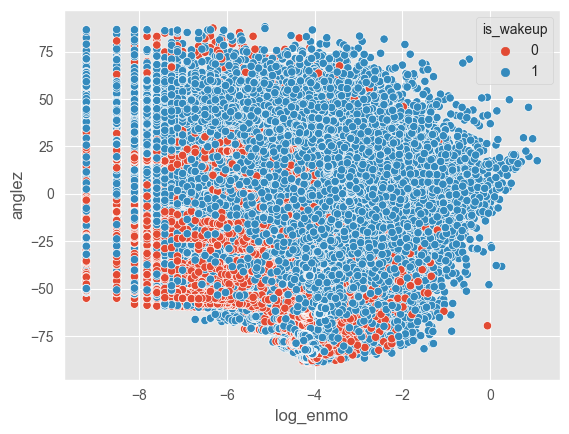

In [28]:
sns.scatterplot(data=df.head(100_000), x='log_enmo', y='anglez', hue='is_wakeup')

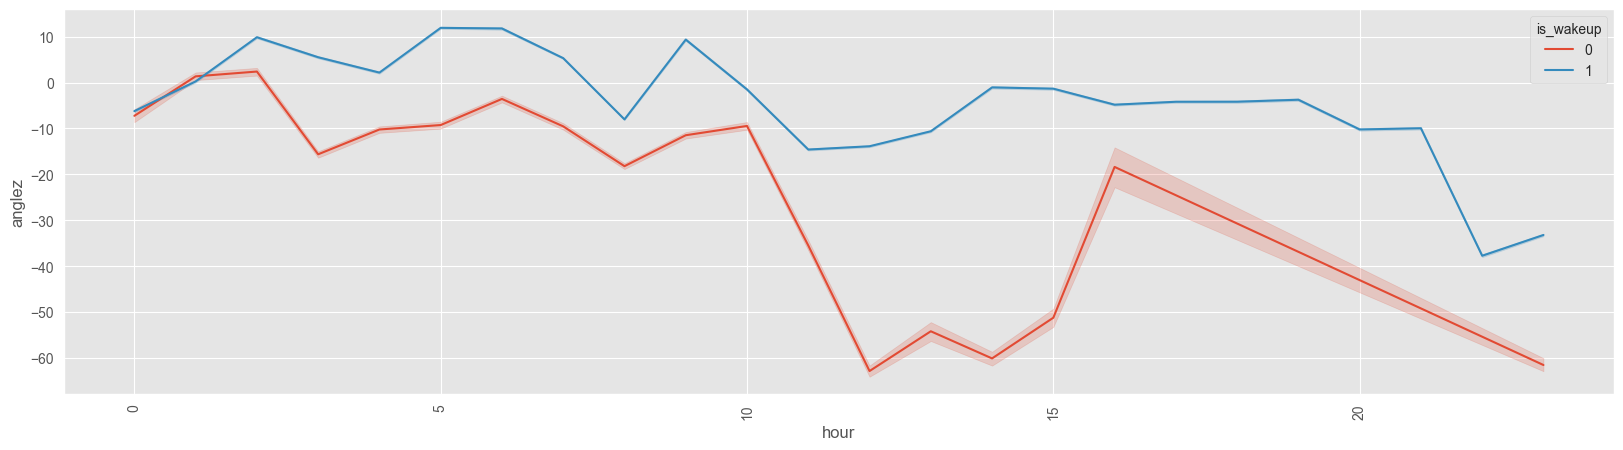

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
ax = sns.lineplot(data=df.head(1_000_000), x='hour', y='anglez', hue='is_wakeup')
ax.tick_params(axis="x", rotation=90)

In [4]:
# sns.jointplot(data=df, x="enmo", y="anglez", marker="+", s=100, marginal_kws=dict(bins=25, fill=False), hue='is_wakeup')

<Axes: xlabel='anglez', ylabel='Count'>

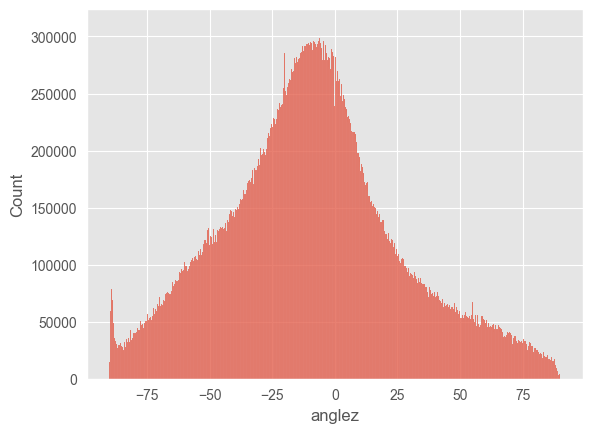

In [5]:
sns.histplot(data=df, x='anglez')

<Axes: xlabel='anglez', ylabel='Count'>

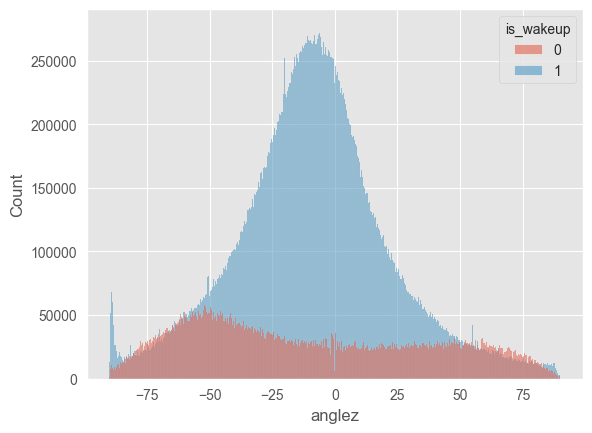

In [6]:
sns.histplot(data=df, x='anglez', hue='is_wakeup')

In [7]:
df.filter(pl.col('is_wakeup') == 1)['anglez'].describe()

statistic,value
str,f64
"""count""",9.4963272e7
"""null_count""",0.0
"""mean""",-8.613751
"""std""",31.08095
"""min""",-90.0
"""max""",90.0
"""median""",-8.9516
"""25%""",-26.8277
"""75%""",8.3575


In [8]:
df.filter(pl.col('is_wakeup') == 0)['anglez'].describe()

statistic,value
str,f64
"""count""",2.9853816e7
"""null_count""",0.0
"""mean""",-10.143611
"""std""",47.055352
"""min""",-90.0
"""max""",90.0
"""median""",-18.689899
"""25%""",-50.4851
"""75%""",30.487


In [9]:
df = df.with_columns(
    pl.col('enmo').log().alias('log_enmo'),
)
df

series_id,step,anglez,enmo,timestamp,is_wakeup,grass_date,grass_hour,log_enmo
str,i32,f32,f32,datetime[μs],i64,str,str,f32
"""038441c925bb""",4992,-78.690598,0.0099,2018-08-15 02:26:00,0,"""2018-08-15""","""02:26:00""",-4.615221
"""038441c925bb""",4993,-78.664902,0.0099,2018-08-15 02:26:05,0,"""2018-08-15""","""02:26:05""",-4.615221
"""038441c925bb""",4994,-78.465897,0.0101,2018-08-15 02:26:10,0,"""2018-08-15""","""02:26:10""",-4.595221
"""038441c925bb""",4995,-78.454597,0.0098,2018-08-15 02:26:15,0,"""2018-08-15""","""02:26:15""",-4.625373
"""038441c925bb""",4996,-78.537804,0.0098,2018-08-15 02:26:20,0,"""2018-08-15""","""02:26:20""",-4.625373
"""038441c925bb""",4997,-78.446999,0.0099,2018-08-15 02:26:25,0,"""2018-08-15""","""02:26:25""",-4.615221
"""038441c925bb""",4998,-78.546501,0.0097,2018-08-15 02:26:30,0,"""2018-08-15""","""02:26:30""",-4.63563
"""038441c925bb""",4999,-78.420998,0.0101,2018-08-15 02:26:35,0,"""2018-08-15""","""02:26:35""",-4.595221
"""038441c925bb""",5000,-78.479301,0.0098,2018-08-15 02:26:40,0,"""2018-08-15""","""02:26:40""",-4.625373


<Axes: xlabel='enmo', ylabel='Count'>

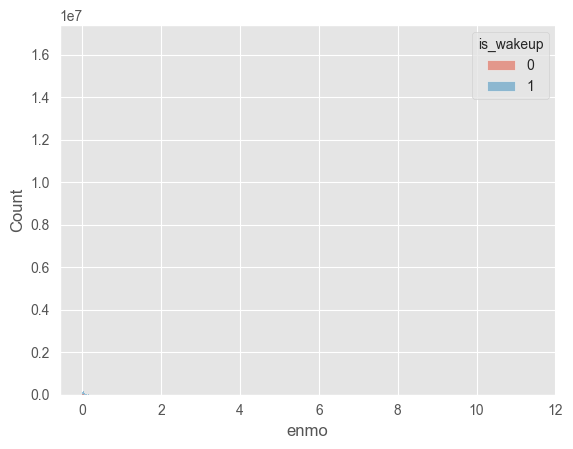

In [10]:
sns.histplot(data=df, x='enmo', hue='is_wakeup')

<Axes: xlabel='log_enmo', ylabel='Count'>

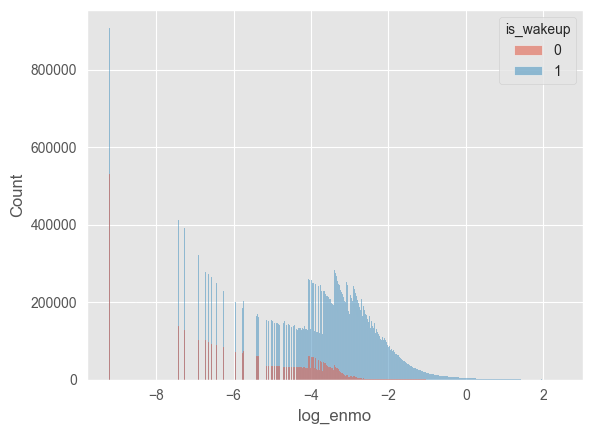

In [11]:
sns.histplot(data=df, x='log_enmo', hue='is_wakeup')

In [ ]:
sns.scatterplot(data=df, x='anglez', y='enmo', hue='is_wakeup')

<Axes: xlabel='anglez', ylabel='enmo'>

In [221]:
tmp = df.filter(pl.col('series_id').is_in(['1e6717d93c1d', '1f96b9668bdf', 'de6fedfb6139', '5aad18e7ce64']))
tmp

series_id,step,anglez,enmo,timestamp,is_wakeup,grass_date,grass_hour,hour,log_enmo
str,i32,f32,f32,datetime[μs],i64,str,str,i8,f32
"""1e6717d93c1d""",0,3.758,0.0385,2018-12-18 16:30:00,1,"""2018-12-18""","""16:30:00""",16,-3.257097
"""1e6717d93c1d""",1,5.3317,0.0391,2018-12-18 16:30:05,1,"""2018-12-18""","""16:30:05""",16,-3.241633
"""1e6717d93c1d""",2,5.6507,0.0527,2018-12-18 16:30:10,1,"""2018-12-18""","""16:30:10""",16,-2.94314
"""1e6717d93c1d""",3,8.0569,0.0548,2018-12-18 16:30:15,1,"""2018-12-18""","""16:30:15""",16,-2.904065
"""1e6717d93c1d""",4,4.0993,0.0366,2018-12-18 16:30:20,1,"""2018-12-18""","""16:30:20""",16,-3.307707
"""1e6717d93c1d""",5,-1.9916,0.0473,2018-12-18 16:30:25,1,"""2018-12-18""","""16:30:25""",16,-3.051245
"""1e6717d93c1d""",6,1.5862,0.0312,2018-12-18 16:30:30,1,"""2018-12-18""","""16:30:30""",16,-3.467337
"""1e6717d93c1d""",7,-1.7214,0.0259,2018-12-18 16:30:35,1,"""2018-12-18""","""16:30:35""",16,-3.653512
"""1e6717d93c1d""",8,-1.3618,0.026,2018-12-18 16:30:40,1,"""2018-12-18""","""16:30:40""",16,-3.649659


In [233]:
a = df.groupby(['series_id', 'is_wakeup'], maintain_order=True).agg(pl.col('timestamp').dt.second().sum())
b = df.groupby(['series_id'], maintain_order=True).agg(pl.col('timestamp').dt.second().sum())

z = (
    a.join(b, how='left', on='series_id')
    .with_columns((pl.col('timestamp') / pl.col('timestamp_right')).alias('pct'))
    .pivot(values='pct', index='series_id', columns='is_wakeup', aggregate_function='sum')
)
z

series_id,0,1
str,f64,f64
"""038441c925bb""",0.311997,0.688003
"""03d92c9f6f8a""",0.086519,0.913481
"""0402a003dae9""",0.214107,0.785893
"""04f547b8017d""",0.237455,0.762545
"""05e1944c3818""",0.106242,0.893758
"""062cae666e2a""",0.045186,0.954814
"""062dbd4c95e6""",0.124426,0.875574
"""08db4255286f""",0.283701,0.716299
"""0a96f4993bd7""",0.385004,0.614996


In [240]:
z['0'].describe(percentiles=(.05, .1, .2))

statistic,value
str,f64
"""count""",269.0
"""null_count""",0.0
"""mean""",0.248299
"""std""",0.107072
"""min""",0.007332
"""max""",0.434571
"""median""",0.280755
"""5%""",0.045186
"""10%""",0.068127


<Axes: xlabel='timestamp', ylabel='anglez'>

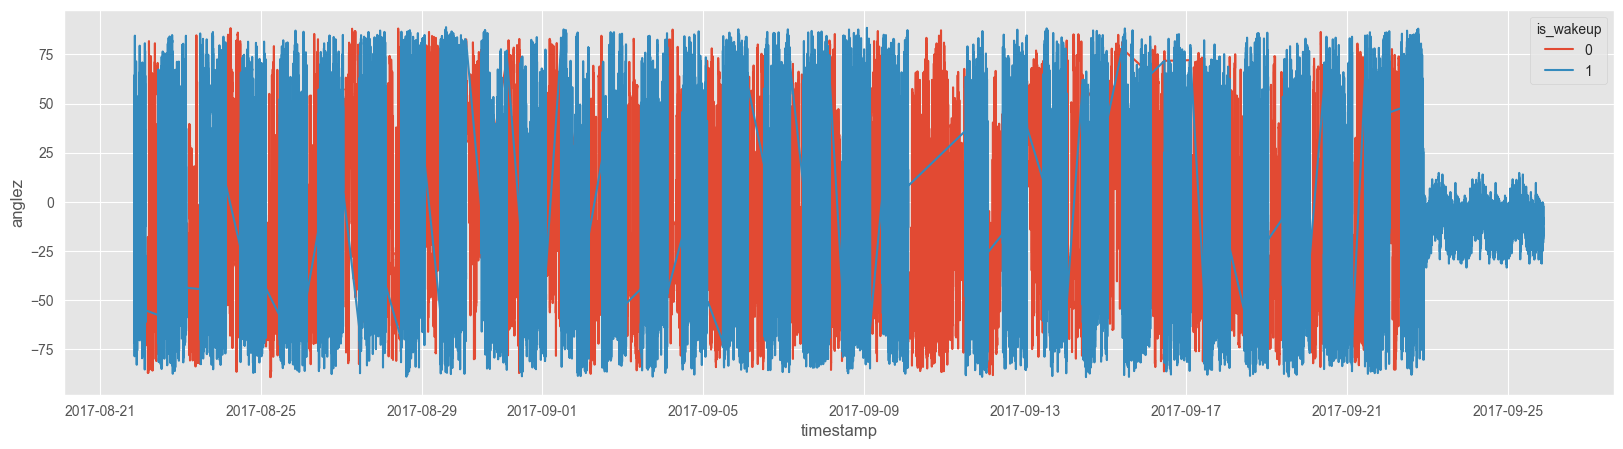

In [232]:
tmp = df.filter(pl.col('series_id') == "0ce74d6d2106")
plt.figure(figsize=(20, 5))
sns.lineplot(data=tmp, x='timestamp', y='anglez', hue='is_wakeup')

In [214]:
unit_long_timestamp = (
    tmp.with_columns(pl.col('timestamp').dt.strftime(format='%Y-%m-%d').alias('grass_date'))
    .groupby(['series_id', 'grass_date', 'is_wakeup'], maintain_order=True).agg((pl.col('timestamp').dt.second()).sum())
    .sort(['series_id','grass_date'])
)

filter_top_k = (
    unit_long_timestamp
    .groupby(['series_id', 'is_wakeup', 'timestamp']).agg(pl.col('grass_date').count())
    .sort(['series_id','grass_date'], descending=True)
    .groupby('series_id').agg(pl.all().head(1))
    .explode('timestamp')
    .with_columns(pl.lit('top').alias('top'))
 )

unit_long_timestamp.join(filter_top_k, on=['series_id', 'timestamp'], how='left')

series_id,grass_date,is_wakeup,timestamp,is_wakeup_right,grass_date_right,top
str,str,i64,u32,list[i64],list[u32],str
"""1e6717d93c1d""","""2018-12-18""",1,148500,null,null,null
"""1e6717d93c1d""","""2018-12-19""",1,294030,null,null,null
"""1e6717d93c1d""","""2018-12-19""",0,181170,null,null,null
"""1e6717d93c1d""","""2018-12-20""",1,475200,[1],[24],"""top"""
"""1e6717d93c1d""","""2018-12-21""",1,294030,null,null,null
"""1e6717d93c1d""","""2018-12-21""",0,181170,null,null,null
"""1e6717d93c1d""","""2018-12-22""",1,323070,null,null,null
"""1e6717d93c1d""","""2018-12-22""",0,152130,null,null,null
"""1e6717d93c1d""","""2018-12-23""",1,298650,null,null,null


In [215]:
filter_top_k

series_id,is_wakeup,timestamp,grass_date,top
str,list[i64],u32,list[u32],str
"""1e6717d93c1d""",[1],475200,[24],"""top"""
"""de6fedfb6139""",[1],475200,[5],"""top"""
"""5aad18e7ce64""",[1],475200,[22],"""top"""
"""1f96b9668bdf""",[1],475200,[16],"""top"""


<Axes: xlabel='timestamp', ylabel='anglez'>

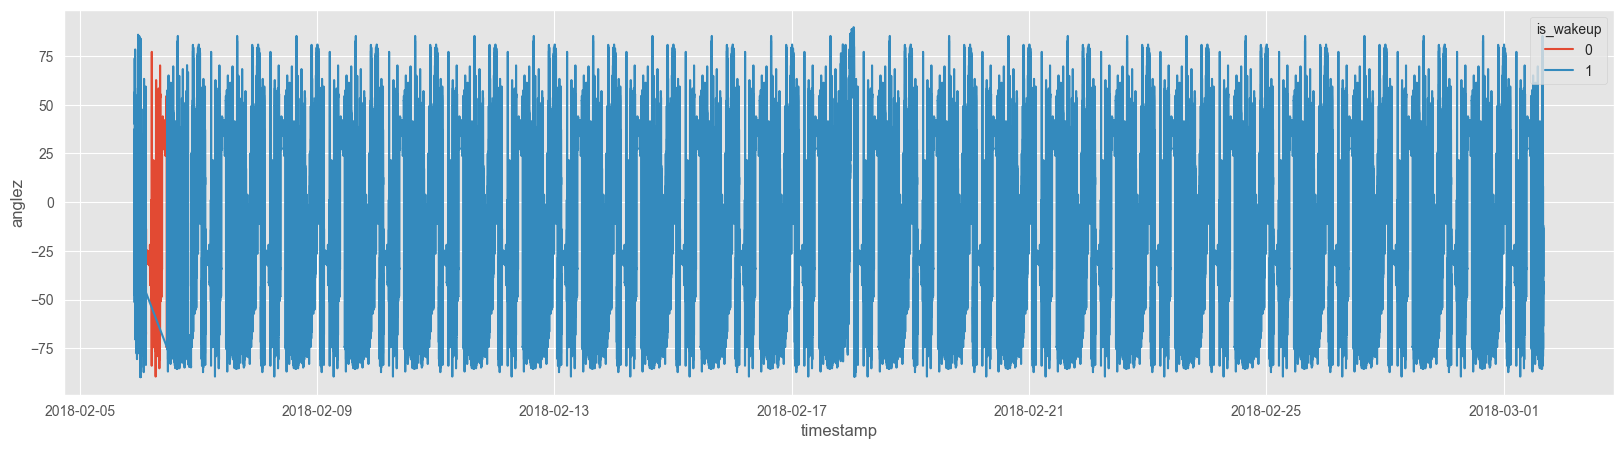

In [216]:
tmp = df.filter(pl.col('series_id') == "5aad18e7ce64")
plt.figure(figsize=(20, 5))
sns.lineplot(data=tmp, x='timestamp', y='anglez', hue='is_wakeup')

(410400, 10)
(410400, 11)


<Axes: xlabel='timestamp', ylabel='anglez'>

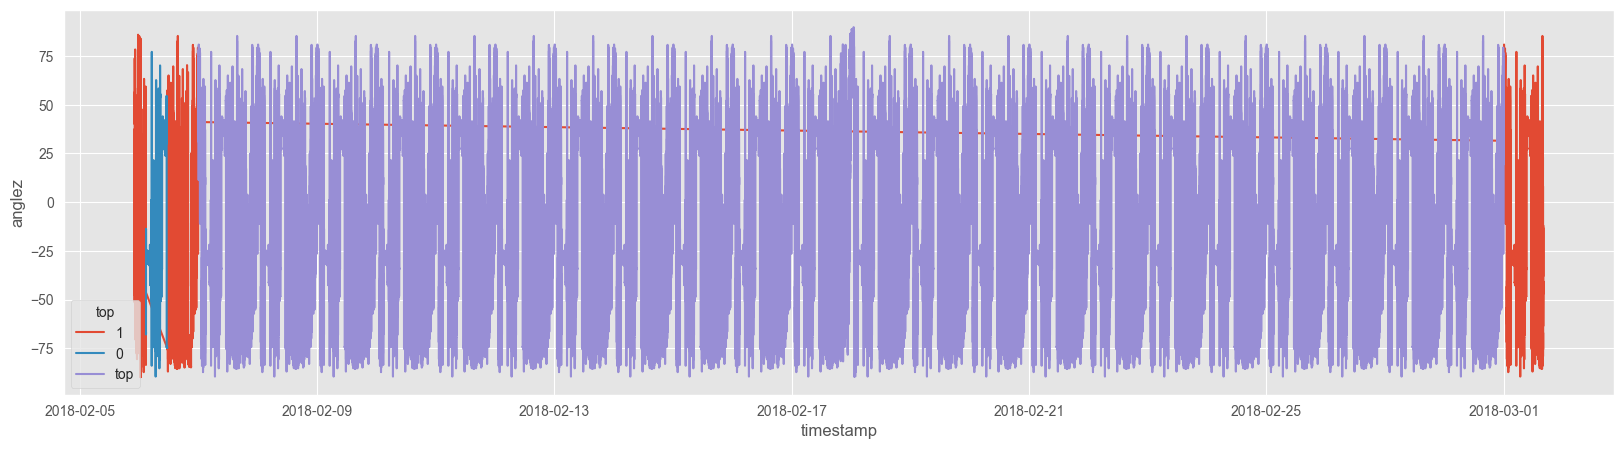

In [217]:
a = unit_long_timestamp.join(filter_top_k, on=['series_id', 'timestamp'], how='left')
print(tmp.shape)
z = (
    tmp.join(a[['series_id', 'grass_date', 'top']].unique(subset=['series_id', 'grass_date']), on=['series_id', 'grass_date'], how='left')
    .with_columns(pl.col('top').fill_null(pl.col('is_wakeup')))
)
print(z.shape)
plt.figure(figsize=(20, 5))
sns.lineplot(data=z, x='timestamp', y='anglez', hue='top')

In [197]:
a[['series_id', 'grass_date', 'top']]

series_id,grass_date,top
str,str,str
"""1e6717d93c1d""","""2018-12-18""",null
"""1e6717d93c1d""","""2018-12-19""",null
"""1e6717d93c1d""","""2018-12-19""",null
"""1e6717d93c1d""","""2018-12-20""","""top"""
"""1e6717d93c1d""","""2018-12-21""",null
"""1e6717d93c1d""","""2018-12-21""",null
"""1e6717d93c1d""","""2018-12-22""",null
"""1e6717d93c1d""","""2018-12-22""",null
"""1e6717d93c1d""","""2018-12-23""",null


In [196]:
a

series_id,grass_date,is_wakeup,timestamp,is_wakeup_right,grass_date_right,top
str,str,i64,u32,list[i64],list[u32],str
"""1e6717d93c1d""","""2018-12-18""",1,148500,null,null,null
"""1e6717d93c1d""","""2018-12-19""",1,294030,null,null,null
"""1e6717d93c1d""","""2018-12-19""",0,181170,null,null,null
"""1e6717d93c1d""","""2018-12-20""",1,475200,[1],[24],"""top"""
"""1e6717d93c1d""","""2018-12-21""",1,294030,null,null,null
"""1e6717d93c1d""","""2018-12-21""",0,181170,null,null,null
"""1e6717d93c1d""","""2018-12-22""",1,323070,null,null,null
"""1e6717d93c1d""","""2018-12-22""",0,152130,null,null,null
"""1e6717d93c1d""","""2018-12-23""",1,298650,null,null,null
